📂 Cargando dataset...


Saving mix.v2i.tensorflow.zip to mix.v2i.tensorflow (15).zip
🚀 Iniciando procesamiento corregido del dataset...

📂 Paso 1: Cargando datos CSV...
✅ Columna de emociones encontrada: 'class'

🔍 Paso 2: Verificando correspondencia imagen-etiqueta...
🔍 Creando dataset verificado...
✅ Dataset verificado: 2756 imágenes válidas de 2756 total

📊 Distribución inicial:
   angry: 606 imágenes
   fear: 207 imágenes
   happy: 666 imágenes
   neutral: 713 imágenes
   sad: 564 imágenes

🖼️ Paso 3: Mostrando muestras del dataset...


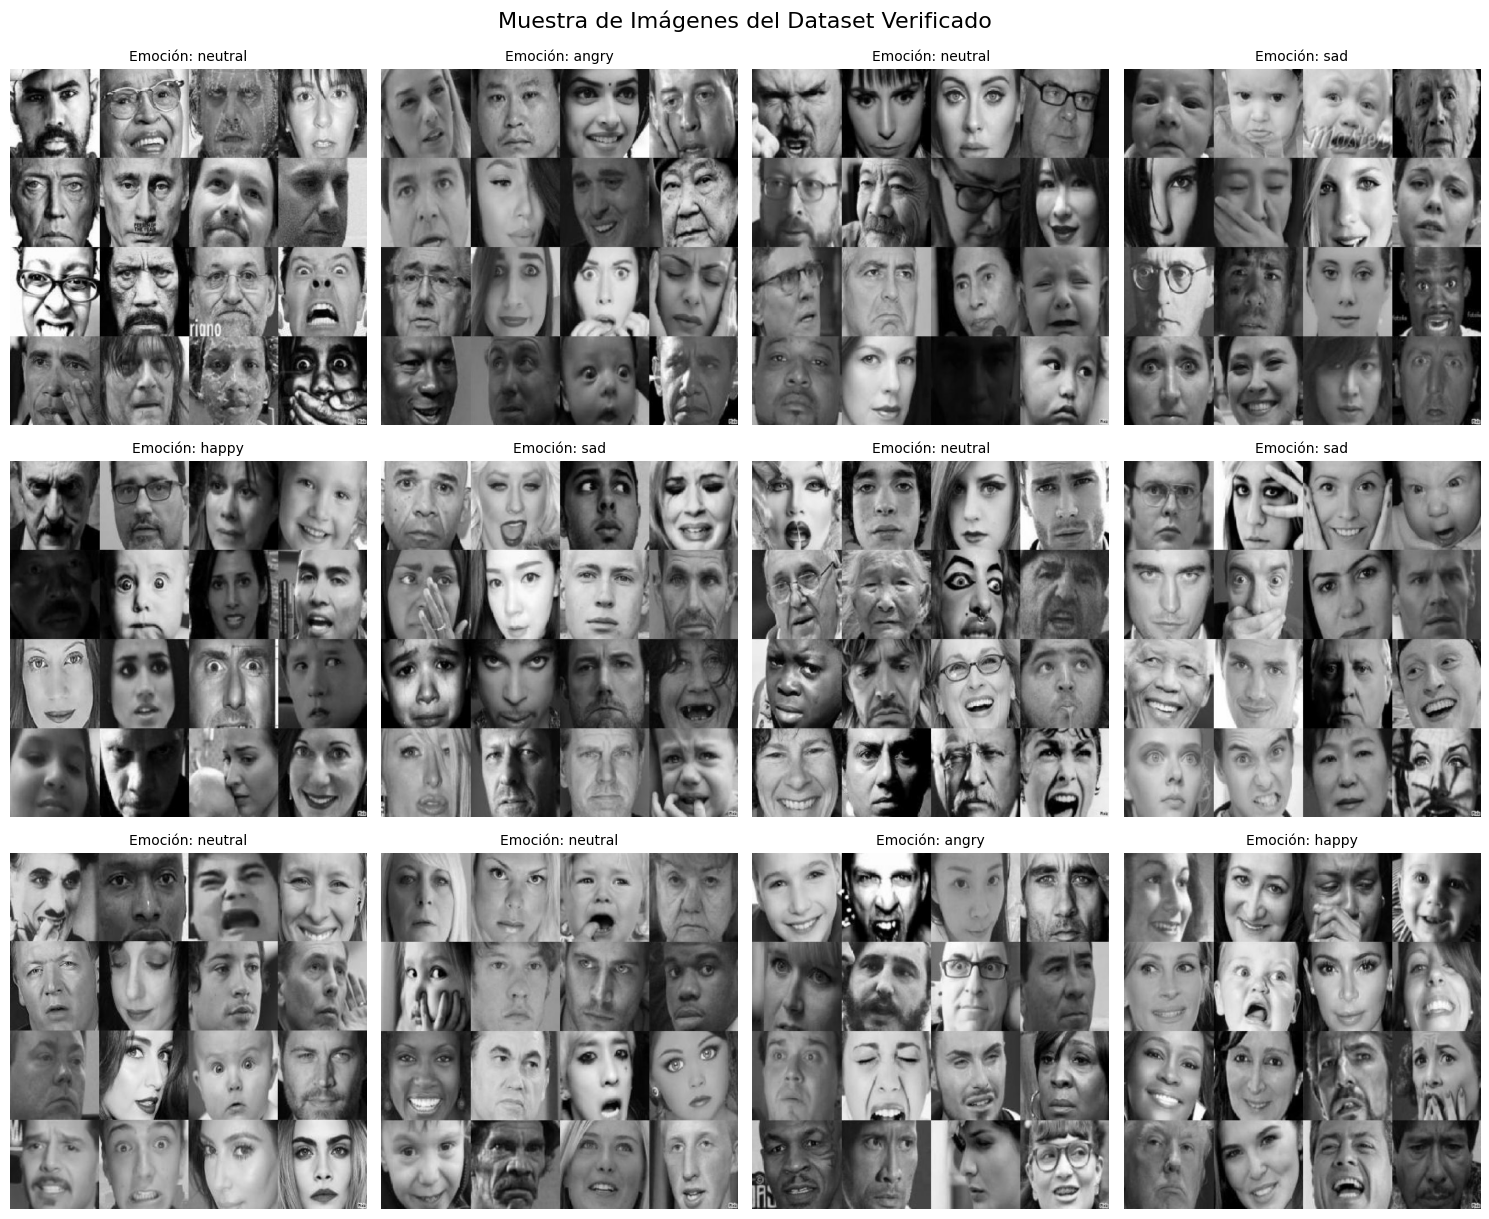


✂️ Paso 4: Dividiendo dataset...
   Entrenamiento: 2204 imágenes
   Validación: 276 imágenes
   Prueba: 276 imágenes

🔄 Paso 5: Cargando imágenes...
🔄 Cargando 2204 imágenes verificadas...
   Procesando lote 1/23
   Procesando lote 2/23
   Procesando lote 3/23
   Procesando lote 4/23
   Procesando lote 5/23
   Procesando lote 6/23
   Procesando lote 7/23
   Procesando lote 8/23
   Procesando lote 9/23
   Procesando lote 10/23
   Procesando lote 11/23
   Procesando lote 12/23
   Procesando lote 13/23
   Procesando lote 14/23
   Procesando lote 15/23
   Procesando lote 16/23
   Procesando lote 17/23
   Procesando lote 18/23
   Procesando lote 19/23
   Procesando lote 20/23
   Procesando lote 21/23
   Procesando lote 22/23
   Procesando lote 23/23
✅ Cargadas exitosamente: 2204
❌ Fallos: 0
🔄 Cargando 276 imágenes verificadas...
   Procesando lote 1/3
   Procesando lote 2/3
   Procesando lote 3/3
✅ Cargadas exitosamente: 276
❌ Fallos: 0
🔄 Cargando 276 imágenes verificadas...
   Procesando 

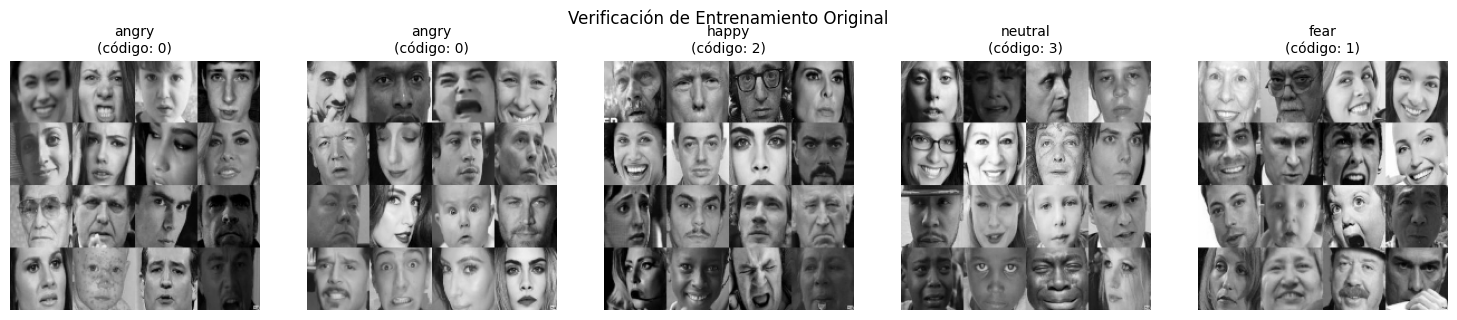


🔍 Verificando integridad de Validación:
   Total de imágenes: 276
   Total de etiquetas: 276
   Distribución:
     angry: 60 imágenes
     fear: 21 imágenes
     happy: 67 imágenes
     neutral: 71 imágenes
     sad: 57 imágenes


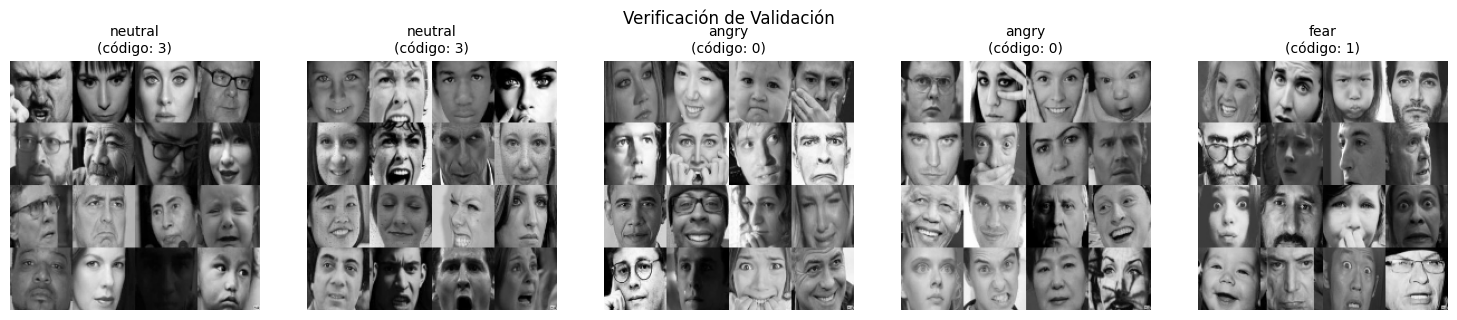


🔍 Verificando integridad de Prueba:
   Total de imágenes: 276
   Total de etiquetas: 276
   Distribución:
     angry: 61 imágenes
     fear: 21 imágenes
     happy: 66 imágenes
     neutral: 72 imágenes
     sad: 56 imágenes


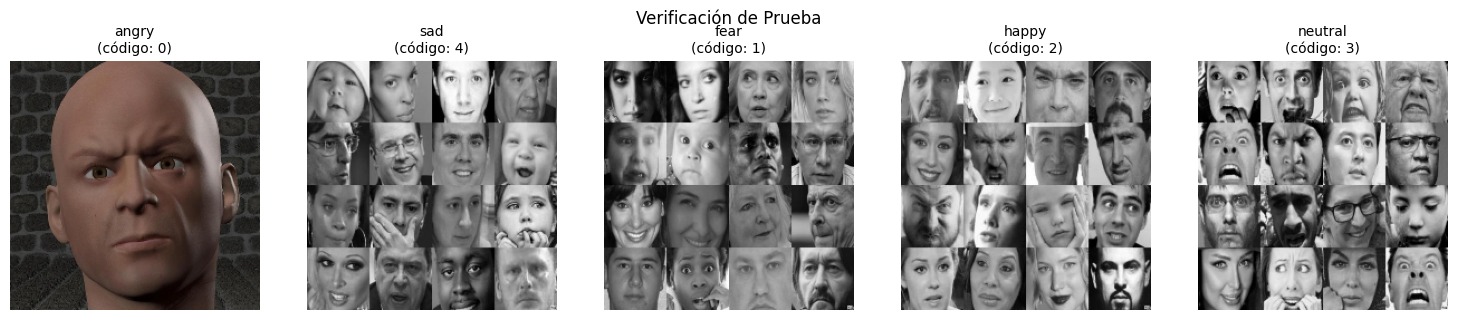


 Paso 8: Aplicando data augmentation (factor 3)...
Método de augmentación: albumentations
📈 Aplicando augmentación (factor 3) con albumentations...
   Generadas 0/4408 imágenes aumentadas
   Generadas 100/4408 imágenes aumentadas
   Generadas 200/4408 imágenes aumentadas
   Generadas 300/4408 imágenes aumentadas
   Generadas 400/4408 imágenes aumentadas
   Generadas 500/4408 imágenes aumentadas
   Generadas 600/4408 imágenes aumentadas
   Generadas 700/4408 imágenes aumentadas
   Generadas 800/4408 imágenes aumentadas
   Generadas 900/4408 imágenes aumentadas
   Generadas 1000/4408 imágenes aumentadas
   Generadas 1100/4408 imágenes aumentadas
   Generadas 1200/4408 imágenes aumentadas
   Generadas 1300/4408 imágenes aumentadas
   Generadas 1400/4408 imágenes aumentadas
   Generadas 1500/4408 imágenes aumentadas
   Generadas 1600/4408 imágenes aumentadas
   Generadas 1700/4408 imágenes aumentadas
   Generadas 1800/4408 imágenes aumentadas
   Generadas 1900/4408 imágenes aumentadas
   

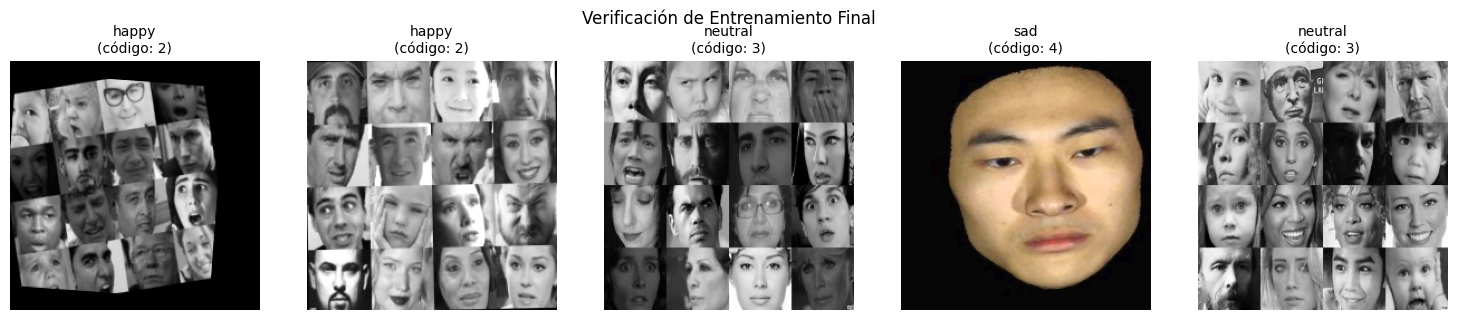


 Procesamiento completado exitosamente!
 Resumen final:
   Entrenamiento: 6612 imágenes
   Validación: 276 imágenes
   Prueba: 276 imágenes
   Clases: 5 (angry, fear, happy, neutral, sad)

🔬 VERIFICACIÓN DETALLADA DE 10 MUESTRAS

Detalles de las muestras seleccionadas:
    1. Índice   273 | Código 0 | Emoción 'angry'
    2. Índice  2019 | Código 0 | Emoción 'angry'
    3. Índice  2308 | Código 1 | Emoción 'fear'
    4. Índice  5002 | Código 1 | Emoción 'fear'
    5. Índice  6447 | Código 2 | Emoción 'happy'
    6. Índice  2263 | Código 2 | Emoción 'happy'
    7. Índice  1053 | Código 3 | Emoción 'neutral'
    8. Índice  1095 | Código 3 | Emoción 'neutral'
    9. Índice  4884 | Código 4 | Emoción 'sad'
   10. Índice  1916 | Código 4 | Emoción 'sad'


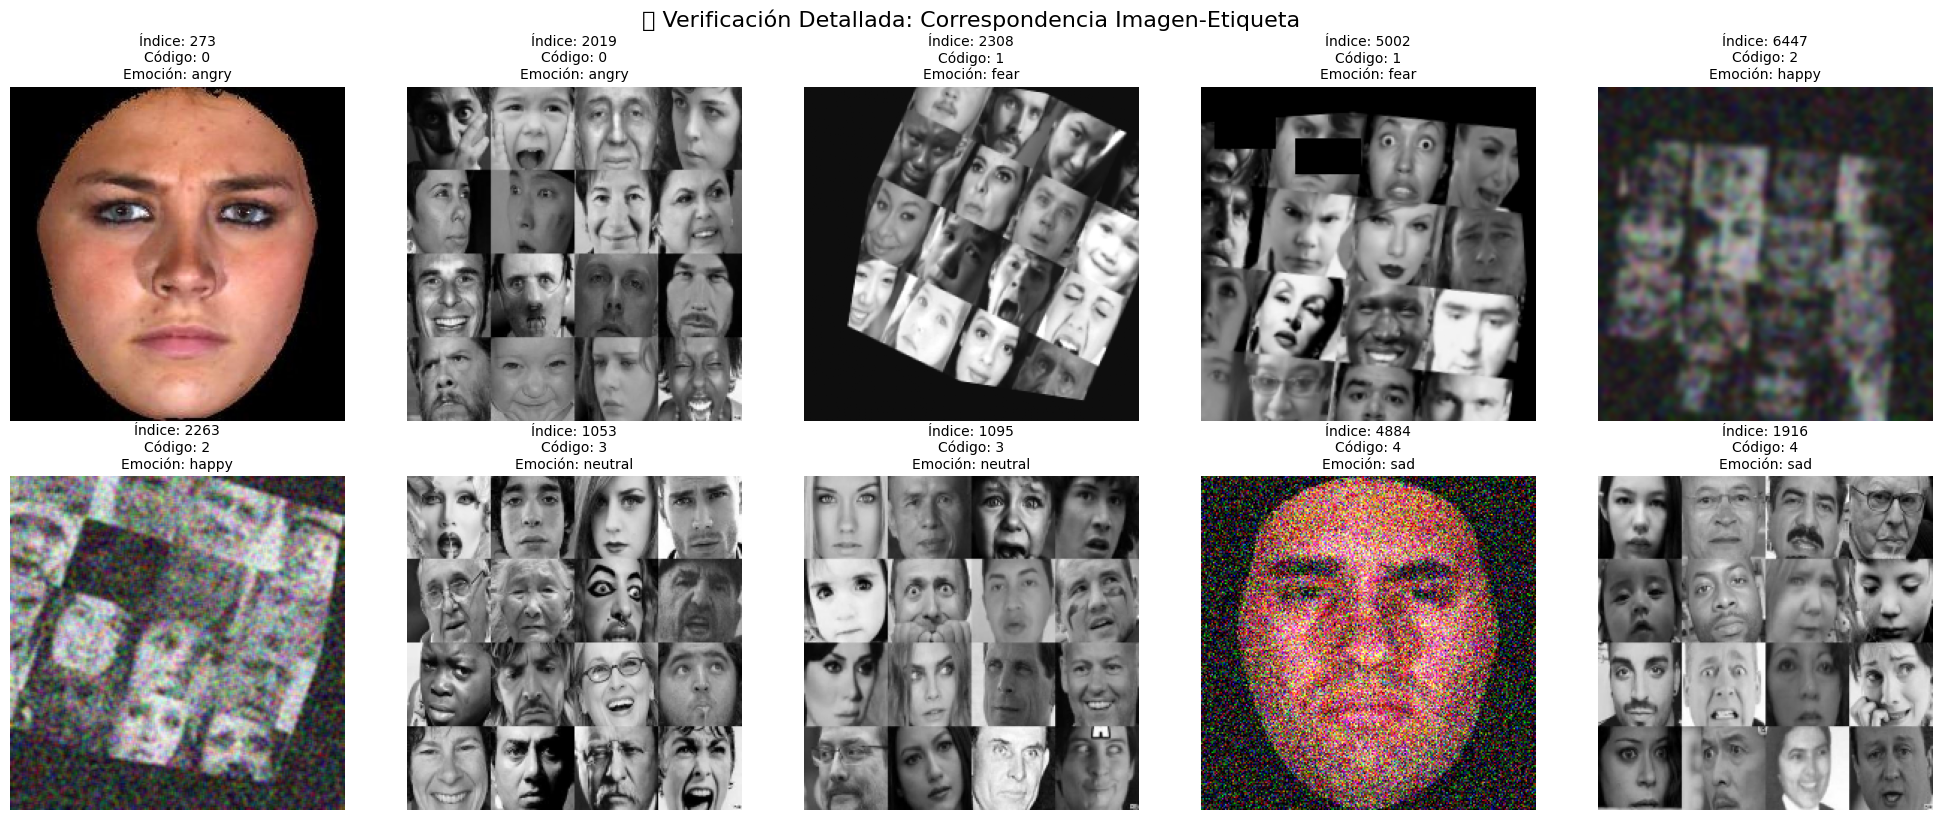


📊 ESTADÍSTICAS FINALES:
   angry   :  1436 imágenes ( 21.7%)
   fear    :   491 imágenes (  7.4%)
   happy   :  1589 imágenes ( 24.0%)
   neutral :  1760 imágenes ( 26.6%)
   sad     :  1336 imágenes ( 20.2%)

🚀 ¡DATOS LISTOS PARA ENTRENAMIENTO!
💡 Accede a los datos con:
   - result['train_data'] para entrenamiento
   - result['val_data'] para validación
   - result['test_data'] para prueba
   - result['label_encoder'] para decodificar etiquetas


In [1]:
# Programa de Reconocimiento de Emociones Faciales
# Procesamiento y Data Augmentation

import os
import pandas as pd
import numpy as np
import zipfile
import cv2
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importar albumentations
try:
    import albumentations as A
    ALBUMENTATIONS_AVAILABLE = True
except ImportError:
    ALBUMENTATIONS_AVAILABLE = False

try:
    from google.colab import files
    COLAB_AVAILABLE = True
except ImportError:
    COLAB_AVAILABLE = False


# CONFIGURACIÓN INICIAL


# Configuración de GPU
if tf.config.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

# Configuración de semillas
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

# Parámetros
IMG_SIZE = 224
EMOTIONS = ['angry', 'neutral', 'fear', 'happy', 'sad']

def upload_and_extract_zip():
    """Subir y extraer archivo ZIP"""
    if COLAB_AVAILABLE:
        uploaded = files.upload()
        zip_filename = list(uploaded.keys())[0]
    else:
        zip_filename = input("Ruta del archivo ZIP: ")
        if not os.path.exists(zip_filename):
            raise FileNotFoundError(f"Archivo no encontrado: {zip_filename}")

    extract_path = './dataset'
    os.makedirs(extract_path, exist_ok=True)

    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    return extract_path

def load_csv_data(dataset_path):
    """Cargar datos desde archivos CSV"""
    all_data = []

    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith('.csv'):
                csv_path = os.path.join(root, file)

                try:
                    df = pd.read_csv(csv_path, encoding='utf-8')
                except:
                    try:
                        df = pd.read_csv(csv_path, encoding='latin-1')
                    except:
                        continue

                df['base_path'] = root
                all_data.append(df)

    if not all_data:
        raise ValueError("No se encontraron archivos CSV válidos")

    return pd.concat(all_data, ignore_index=True)

def find_emotion_column(df):
    """Encontrar columna de emociones"""
    possible_cols = ['emotion', 'label', 'class', 'category', 'target']

    for col in df.columns:
        if col.lower() in possible_cols:
            return col
    return None

def create_verified_dataset(df, emotion_column):
    """Crear dataset verificado con correspondencia imagen-etiqueta correcta"""
    print("🔍 Creando dataset verificado...")

    verified_data = []

    for idx, row in df.iterrows():
        # Encontrar columna de filename
        filename_col = None
        for col in ['filename', 'image', 'file', 'image_name']:
            if col in row and pd.notna(row[col]):
                filename_col = col
                break

        if not filename_col:
            continue

        emotion = row[emotion_column]
        if emotion not in EMOTIONS:
            continue

        # Construir ruta de imagen
        image_path = os.path.join(row['base_path'], str(row[filename_col]))

        # Verificar que existe
        if os.path.exists(image_path):
            verified_data.append({
                'image_path': image_path,
                'emotion': emotion,
                'original_index': idx
            })

    print(f"✅ Dataset verificado: {len(verified_data)} imágenes válidas de {len(df)} total")
    return verified_data

def load_and_preprocess_image(image_path, target_size=(224, 224)):
    """Cargar y preprocesar imagen con mejor manejo de errores"""
    try:
        # Intentar cargar con cv2
        image = cv2.imread(image_path)
        if image is None:
            # Intentar con PIL como respaldo
            pil_image = Image.open(image_path)
            if pil_image.mode != 'RGB':
                pil_image = pil_image.convert('RGB')
            image = np.array(pil_image)
        else:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Redimensionar
        processed_image = cv2.resize(image, target_size)
        processed_image = processed_image.astype(np.float32) / 255.0

        return processed_image, image
    except Exception as e:
        print(f"⚠️ Error cargando {image_path}: {e}")
        return None, None

def show_sample_images(verified_data, num_samples=12):
    """Mostrar imágenes de muestra del dataset verificado"""
    if len(verified_data) < num_samples:
        num_samples = len(verified_data)

    # Seleccionar muestras aleatorias
    sample_indices = np.random.choice(len(verified_data), num_samples, replace=False)

    fig, axes = plt.subplots(3, 4, figsize=(15, 12))
    axes = axes.flatten()

    for i, idx in enumerate(sample_indices):
        data_point = verified_data[idx]
        processed_img, original_img = load_and_preprocess_image(data_point['image_path'])

        if original_img is not None:
            axes[i].imshow(original_img)
            axes[i].set_title(f"Emoción: {data_point['emotion']}", fontsize=10)
            axes[i].axis('off')
        else:
            axes[i].text(0.5, 0.5, 'Error al cargar', ha='center', va='center')
            axes[i].set_title(f"Error: {data_point['emotion']}", fontsize=10)
            axes[i].axis('off')

    plt.tight_layout()
    plt.suptitle('Muestra de Imágenes del Dataset Verificado', fontsize=16, y=1.02)
    plt.show()

def create_augmentation_pipeline():
    """Pipeline de augmentación con Albumentations"""
    if ALBUMENTATIONS_AVAILABLE:
        return A.Compose([
            A.Rotate(limit=20, p=0.7),
            A.HorizontalFlip(p=0.5),
            A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=15, p=0.7),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
            A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.5),
            A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),
            A.GaussianBlur(blur_limit=3, p=0.3),
            A.CoarseDropout(max_holes=8, max_height=8, max_width=8, p=0.3),
        ])
    return None

def create_keras_augmentation():
    """Pipeline de augmentación con Keras"""
    return ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        brightness_range=[0.8, 1.2]
    )

def apply_augmentation_albumentations(image, transform):
    """Aplicar augmentación con Albumentations"""
    try:
        if image.dtype == np.float32:
            image_uint8 = (image * 255).astype(np.uint8)
        else:
            image_uint8 = image

        augmented = transform(image=image_uint8)
        return augmented['image'].astype(np.float32) / 255.0
    except:
        return image

def load_dataset_from_verified_data(verified_data, batch_size=100):
    """
    FUNCIÓN CLAVE: Cargar dataset manteniendo correspondencia perfecta
    """
    print(f"🔄 Cargando {len(verified_data)} imágenes verificadas...")

    images = []
    emotions = []
    failed_count = 0

    # Procesar en lotes para mostrar progreso
    for i in range(0, len(verified_data), batch_size):
        batch_end = min(i + batch_size, len(verified_data))
        batch_data = verified_data[i:batch_end]

        print(f"   Procesando lote {i//batch_size + 1}/{(len(verified_data)-1)//batch_size + 1}")

        for data_point in batch_data:
            processed_img, _ = load_and_preprocess_image(data_point['image_path'], (IMG_SIZE, IMG_SIZE))

            if processed_img is not None:
                images.append(processed_img)
                emotions.append(data_point['emotion'])
            else:
                failed_count += 1

    print(f"✅ Cargadas exitosamente: {len(images)}")
    print(f"❌ Fallos: {failed_count}")

    return np.array(images), np.array(emotions)

def augment_dataset(X_train, y_train, augment_factor=2, method='keras'):
    """Aplicar data augmentation manteniendo correspondencia"""
    print(f"📈 Aplicando augmentación (factor {augment_factor}) con {method}...")

    original_count = len(X_train)
    augmented_needed = (original_count * (augment_factor - 1))  # Corregido el cálculo

    if augmented_needed <= 0:
        return X_train, y_train

    X_augmented = []
    y_augmented = []

    if method == 'albumentations' and ALBUMENTATIONS_AVAILABLE:
        transform = create_augmentation_pipeline()

        for i in range(augmented_needed):
            if i % 100 == 0:
                print(f"   Generadas {i}/{augmented_needed} imágenes aumentadas")

            # Seleccionar imagen aleatoria
            idx = np.random.randint(0, len(X_train))
            original_image = X_train[idx]
            original_label = y_train[idx]

            # Aplicar augmentación
            augmented_image = apply_augmentation_albumentations(original_image, transform)

            X_augmented.append(augmented_image)
            y_augmented.append(original_label)

    elif method == 'keras':
        datagen = create_keras_augmentation()
        generated = 0

        while generated < augmented_needed:
            if generated % 100 == 0:
                print(f"   Generadas {generated}/{augmented_needed} imágenes aumentadas")

            # Seleccionar imagen aleatoria
            idx = np.random.randint(0, len(X_train))
            original_image = X_train[idx]
            original_label = y_train[idx]

            # Aplicar augmentación
            img_batch = np.expand_dims(original_image, axis=0)
            aug_iter = datagen.flow(img_batch, batch_size=1)
            augmented_img = next(aug_iter)[0]

            X_augmented.append(augmented_img)
            y_augmented.append(original_label)
            generated += 1

    # Combinar datos originales y aumentados
    X_final = np.concatenate([X_train, np.array(X_augmented)], axis=0)
    y_final = np.concatenate([y_train, np.array(y_augmented)], axis=0)

    print(f"✅ Augmentación completada: {len(X_final)} imágenes totales")
    return X_final, y_final

def verify_dataset_integrity(X, y, label_encoder, dataset_name, num_samples=5):
    """Verificar integridad del dataset"""
    print(f"\n🔍 Verificando integridad de {dataset_name}:")
    print(f"   Total de imágenes: {len(X)}")
    print(f"   Total de etiquetas: {len(y)}")

    # Verificar distribución
    if len(y) > 0:
        unique_labels, counts = np.unique(y, return_counts=True)
        print("   Distribución:")
        for label_idx, count in zip(unique_labels, counts):
            emotion_name = label_encoder.classes_[label_idx]
            print(f"     {emotion_name}: {count} imágenes")

        # Mostrar algunas muestras aleatorias para verificación visual
        if len(X) >= num_samples:
            sample_indices = np.random.choice(len(X), num_samples, replace=False)

            fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
            if num_samples == 1:
                axes = [axes]

            for i, idx in enumerate(sample_indices):
                axes[i].imshow(X[idx])
                emotion_name = label_encoder.classes_[y[idx]]
                axes[i].set_title(f'{emotion_name}\n(código: {y[idx]})', fontsize=10)
                axes[i].axis('off')

            plt.tight_layout()
            plt.suptitle(f'Verificación de {dataset_name}', fontsize=12, y=1.05)
            plt.show()

def process_dataset_corrected(dataset_path, augment_factor=3, show_samples=True):
    """
    FUNCIÓN PRINCIPAL CORREGIDA - Procesar dataset manteniendo correspondencia perfecta
    """
    print("🚀 Iniciando procesamiento corregido del dataset...")

    # 1. Cargar datos CSV
    print("\n📂 Paso 1: Cargando datos CSV...")
    df = load_csv_data(dataset_path)
    emotion_column = find_emotion_column(df)

    if emotion_column is None:
        raise ValueError("No se encontró columna de emociones")

    print(f"✅ Columna de emociones encontrada: '{emotion_column}'")

    # 2. Crear dataset verificado
    print("\n🔍 Paso 2: Verificando correspondencia imagen-etiqueta...")
    verified_data = create_verified_dataset(df[df[emotion_column].isin(EMOTIONS)], emotion_column)

    if len(verified_data) == 0:
        raise ValueError("No se encontraron datos válidos")

    # Mostrar distribución inicial
    emotions_list = [data['emotion'] for data in verified_data]
    unique_emotions, counts = np.unique(emotions_list, return_counts=True)
    print("\n📊 Distribución inicial:")
    for emotion, count in zip(unique_emotions, counts):
        print(f"   {emotion}: {count} imágenes")

    # 3. Mostrar muestras si se solicita
    if show_samples:
        print("\n🖼️ Paso 3: Mostrando muestras del dataset...")
        show_sample_images(verified_data)

    # 4. Dividir datos ANTES de cargar imágenes (clave para mantener correspondencia)
    print("\n✂️ Paso 4: Dividiendo dataset...")

    # Extraer rutas y emociones para división estratificada
    image_paths = [data['image_path'] for data in verified_data]
    emotions = [data['emotion'] for data in verified_data]

    # División estratificada
    indices = list(range(len(verified_data)))

    # Train/temp split (80/20)
    train_indices, temp_indices = train_test_split(
        indices, test_size=0.2, random_state=SEED,
        stratify=emotions
    )

    # Temp -> Val/Test split (10/10 del total)
    temp_emotions = [emotions[i] for i in temp_indices]
    val_indices, test_indices = train_test_split(
        temp_indices, test_size=0.5, random_state=SEED,
        stratify=temp_emotions
    )

    # Crear subsets verificados
    train_data = [verified_data[i] for i in train_indices]
    val_data = [verified_data[i] for i in val_indices]
    test_data = [verified_data[i] for i in test_indices]

    print(f"   Entrenamiento: {len(train_data)} imágenes")
    print(f"   Validación: {len(val_data)} imágenes")
    print(f"   Prueba: {len(test_data)} imágenes")

    # 5. Cargar imágenes manteniendo correspondencia
    print("\n🔄 Paso 5: Cargando imágenes...")

    X_train, y_train_text = load_dataset_from_verified_data(train_data)
    X_val, y_val_text = load_dataset_from_verified_data(val_data)
    X_test, y_test_text = load_dataset_from_verified_data(test_data)

    # 6. Codificar etiquetas
    print("\n🏷️ Paso 6: Codificando etiquetas...")
    label_encoder = LabelEncoder()
    label_encoder.fit(EMOTIONS)  # Ajustar a todas las emociones posibles

    y_train = label_encoder.transform(y_train_text)
    y_val = label_encoder.transform(y_val_text)
    y_test = label_encoder.transform(y_test_text)

    print("Mapeo de etiquetas:")
    for i, emotion in enumerate(label_encoder.classes_):
        print(f"   {emotion} -> {i}")

    # 7. Verificar integridad antes de augmentación
    print("\n🔍 Paso 7: Verificando integridad antes de augmentación...")
    verify_dataset_integrity(X_train, y_train, label_encoder, "Entrenamiento Original")
    verify_dataset_integrity(X_val, y_val, label_encoder, "Validación")
    verify_dataset_integrity(X_test, y_test, label_encoder, "Prueba")

    # 8. Aplicar data augmentation
    print(f"\n Paso 8: Aplicando data augmentation (factor {augment_factor})...")

    if augment_factor > 1:
        method = 'albumentations' if ALBUMENTATIONS_AVAILABLE else 'keras'
        print(f"Método de augmentación: {method}")

        X_train_aug, y_train_aug = augment_dataset(
            X_train, y_train,
            augment_factor=augment_factor,
            method=method
        )
    else:
        X_train_aug, y_train_aug = X_train, y_train

    # 9. Verificación final
    print("\n✅ Paso 9: Verificación final...")
    verify_dataset_integrity(X_train_aug, y_train_aug, label_encoder, "Entrenamiento Final")

    print("\n Procesamiento completado exitosamente!")
    print(f" Resumen final:")
    print(f"   Entrenamiento: {len(X_train_aug)} imágenes")
    print(f"   Validación: {len(X_val)} imágenes")
    print(f"   Prueba: {len(X_test)} imágenes")
    print(f"   Clases: {len(label_encoder.classes_)} ({', '.join(label_encoder.classes_)})")

    return {
        'train_data': (X_train_aug, y_train_aug),
        'val_data': (X_val, y_val),
        'test_data': (X_test, y_test),
        'label_encoder': label_encoder,
        'num_classes': len(label_encoder.classes_),
        'class_names': label_encoder.classes_
    }

def detailed_verification(result, num_samples=10):
    """Verificación detallada con visualización"""
    if result is None:
        print("❌ No hay datos para verificar")
        return

    print(f"\n🔬 VERIFICACIÓN DETALLADA DE {num_samples} MUESTRAS")

    X_train, y_train = result['train_data']
    label_encoder = result['label_encoder']

    # Seleccionar muestras de cada clase si es posible
    samples_per_class = max(1, num_samples // len(label_encoder.classes_))
    selected_indices = []

    for class_idx in range(len(label_encoder.classes_)):
        class_indices = np.where(y_train == class_idx)[0]
        if len(class_indices) > 0:
            sample_count = min(samples_per_class, len(class_indices))
            selected = np.random.choice(class_indices, sample_count, replace=False)
            selected_indices.extend(selected)

    # Limitar al número total solicitado
    if len(selected_indices) > num_samples:
        selected_indices = np.random.choice(selected_indices, num_samples, replace=False)

    # Mostrar verificación
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()

    print("\nDetalles de las muestras seleccionadas:")
    for i, idx in enumerate(selected_indices[:10]):
        image = X_train[idx]
        label_code = y_train[idx]
        emotion_name = label_encoder.classes_[label_code]

        axes[i].imshow(image)
        axes[i].set_title(f'Índice: {idx}\nCódigo: {label_code}\nEmoción: {emotion_name}',
                         fontsize=10)
        axes[i].axis('off')

        print(f"   {i+1:2d}. Índice {idx:5d} | Código {label_code} | Emoción '{emotion_name}'")

    # Ocultar ejes no utilizados
    for i in range(len(selected_indices), 10):
        axes[i].axis('off')

    plt.tight_layout()
    plt.suptitle('🔬 Verificación Detallada: Correspondencia Imagen-Etiqueta', fontsize=16, y=1.02)
    plt.show()

    # Mostrar estadísticas de distribución
    print(f"\n📊 ESTADÍSTICAS FINALES:")
    unique_labels, counts = np.unique(y_train, return_counts=True)
    total_images = len(y_train)

    for label_idx, count in zip(unique_labels, counts):
        emotion_name = label_encoder.classes_[label_idx]
        percentage = (count / total_images) * 100
        print(f"   {emotion_name:8s}: {count:5d} imágenes ({percentage:5.1f}%)")

def main():
    """Función principal corregida"""
    try:
        # Cargar dataset
        print("📂 Cargando dataset...")
        dataset_path = upload_and_extract_zip()

        # Procesar datos con función corregida
        result = process_dataset_corrected(
            dataset_path,
            augment_factor=3,
            show_samples=True
        )

        # Verificación detallada
        detailed_verification(result, num_samples=10)

        return result

    except Exception as e:
        print(f"❌ Error: {e}")
        import traceback
        traceback.print_exc()
        return None

# ========================================
# EJECUTAR
# ========================================

if __name__ == "__main__":
    result = main()

    if result:
        print("\n🚀 ¡DATOS LISTOS PARA ENTRENAMIENTO!")
        print("💡 Accede a los datos con:")
        print("   - result['train_data'] para entrenamiento")
        print("   - result['val_data'] para validación")
        print("   - result['test_data'] para prueba")
        print("   - result['label_encoder'] para decodificar etiquetas")
    else:
        print("❌ El procesamiento falló. Revisa los errores anteriores.")